## Подготовка данных к посторению модели

Набор данных взят из открытого источника: https://www.kaggle.com/datasets/johnds2/bankdefaultsinrussia

Набор включает в себя ежемесячные финансовые показатели банков, данные по банковской системе и макроэкономическим показателям для всех российских банков за период с 2010 по 2017 год.



In [ ]:
# Загружаем необходимые библиотеки
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
import time

In [ ]:
# Загружаем данные из csv-таблицы в переменную df:
df = pd.read_csv('dataset.csv', sep = ',')
df.head(3)

,лицензия,дата,net_assets,ROA,liquid,ibl,stocks,bond,oth_cap,sunk_retail_credit,...,micex_return,net_foreign_assets_diff,net_gov_debt_diff,other_fin_debt_diff,retail_debt_SA_DETREND_diff,stocks_capital_diff,i_retail_spread_diff,usd_rub_return,miacr_diff,default
0,0.0,2010-02-01,423017.0,27.0,112770.0,60000.0,0.0,0.0,0.0,0.0,...,0.000000,-156425.0,1595305.0,47521.0,33587.30532,214757.0,0.0,0.008065,-0.830116,0.0
1,0.0,2010-03-01,498411.0,75.0,172628.0,90000.0,0.0,0.0,0.0,0.0,...,-0.057148,225429.0,-265831.0,-34392.0,22186.02349,59909.0,-0.1,0.010699,-0.172562,0.0
2,0.0,2010-04-01,571220.0,54.0,211860.0,90000.0,0.0,0.0,0.0,997.0,...,0.043424,-128438.0,430871.0,-21876.0,-14983.52885,4293.0,0.1,-0.019848,-0.296650,0.0


In [ ]:
# Получение названий колонок
df.columns

Index(['лицензия', 'дата', 'net_assets', 'ROA', 'liquid', 'ibl', 'stocks',
       'bond', 'oth_cap', 'sunk_retail_credit', 'NI', 'organization_credit',
       'sunk_organization_credit', 'credit_portf', 'sunk_credit_portf',
       'organization_deposit', 'retail_deposit', 'security_tot', 'ROE',
       'retail_credit', 'reserv_credit_perc', 'zalog_credit_perc',
       'foreign_na_fr', 'retail_deposit_fr', 'N3', 'N2', 'N1', 'capital',
       'msk_spb', 'INF_SA', 'NX_growth', 'micex_std', 'miacr_std',
       'miacr_amount', 'usd_rub_std_diff', 'micex_return',
       'net_foreign_assets_diff', 'net_gov_debt_diff', 'other_fin_debt_diff',
       'retail_debt_SA_DETREND_diff', 'stocks_capital_diff',
       'i_retail_spread_diff', 'usd_rub_return', 'miacr_diff', 'default'],
      dtype='object')

In [ ]:
# Переименование колонок, приводим названия к одному стилю
df.rename(columns={'лицензия': 'license', 'дата': 'date'}, inplace=True)

# Вывод обновленного датафрейма
print(df.columns)

Index(['license', 'date', 'net_assets', 'ROA', 'liquid', 'ibl', 'stocks',
       'bond', 'oth_cap', 'sunk_retail_credit', 'NI', 'organization_credit',
       'sunk_organization_credit', 'credit_portf', 'sunk_credit_portf',
       'organization_deposit', 'retail_deposit', 'security_tot', 'ROE',
       'retail_credit', 'reserv_credit_perc', 'zalog_credit_perc',
       'foreign_na_fr', 'retail_deposit_fr', 'N3', 'N2', 'N1', 'capital',
       'msk_spb', 'INF_SA', 'NX_growth', 'micex_std', 'miacr_std',
       'miacr_amount', 'usd_rub_std_diff', 'micex_return',
       'net_foreign_assets_diff', 'net_gov_debt_diff', 'other_fin_debt_diff',
       'retail_debt_SA_DETREND_diff', 'stocks_capital_diff',
       'i_retail_spread_diff', 'usd_rub_return', 'miacr_diff', 'default'],
      dtype='object')


In [ ]:
# Выясним особенности типов данных и содержимого столбцов.
df.info() #видим, что отсутствует информация о банке и дате для 1956 записей

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72439 entries, 0 to 72438
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   license                      70483 non-null  float64
 1   date                         70483 non-null  object 
 2   net_assets                   72439 non-null  float64
 3   ROA                          72439 non-null  float64
 4   liquid                       72439 non-null  float64
 5   ibl                          72439 non-null  float64
 6   stocks                       72439 non-null  float64
 7   bond                         72439 non-null  float64
 8   oth_cap                      72439 non-null  float64
 9   sunk_retail_credit           72439 non-null  float64
 10  NI                           72439 non-null  float64
 11  organization_credit          72439 non-null  float64
 12  sunk_organization_credit     72439 non-null  float64
 13  credit_portf    

In [ ]:
# Преобразование значений столбца 'date' в формат даты
df['date'] = pd.to_datetime(df['date'])

# Вывод обновленного датафрейма
print(df['date'])

0       2010-02-01
1       2010-03-01
2       2010-04-01
3       2010-05-01
4       2010-06-01
           ...    
72434   2013-06-01
72435   2013-07-01
72436   2013-08-01
72437   2013-09-01
72438   2013-10-01
Name: date, Length: 72439, dtype: datetime64[ns]


In [ ]:
# Определим за какой период предоставлены данные
min_date = df['date'].min()
max_date = df['date'].max()

print(f'Начальная дата анализируемого периода: {min_date}\n'
      f'Конечная дата анализируемого периода: {max_date}')

Начальная дата анализируемого периода: 2010-02-01 00:00:00
Конечная дата анализируемого периода: 2017-12-01 00:00:00


In [ ]:
# Номер лицензии является уникальным для каждого банка,
# посмотрим информацию о скольких банках содержит набор данных
print("Количество банков в наборе данных:", df['license'].nunique())

Количество банков в наборе данных: 1006


In [ ]:
# Посмотрим на уникальные значения в колонке 'default'
df['default'].unique()

array([0., 1.])

In [ ]:
default_banks = df[df['default'] == 1].groupby(['license', 'default']).size().reset_index(name='count')
print("Количество банков, у которых была отозвана лицензия:", default_banks.shape[0])

Количество банков, у которых была отозвана лицензия: 323


Из общего количества банков (1006) в наборе данных у 323 банков была отозвана лицензия. Это означает, что примерно 32% банков в наборе данных обанкротились в заданном периоде.

Распределение количества записей по каждому банку обозначает данные за период с 2010-02-01 по 2017-12-01. Это позволяет проводить анализ финансовых показателей банков за восьмилетний период.

В стоблце 'default' значения корректны.

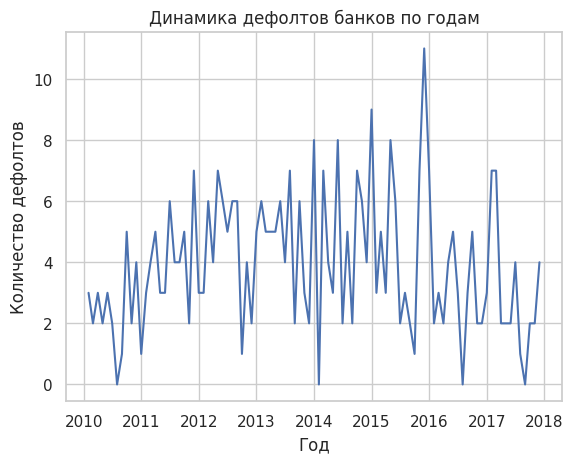

In [ ]:
# Построим график для визуализиации дефотолов банков на весь анализируемый период
defaulted = df[df.default == 1].license.unique()
_df = df[df.license.isin(defaulted)]
_df = _df.groupby('date')['default'].sum().reset_index()

plt.plot(_df['date'], _df['default'])
plt.xlabel('Год')
plt.ylabel('Количество дефолтов')
plt.title('Динамика дефолтов банков по годам')
plt.show()

На основе анализа графика "Динамики дефолтов банков по годам", мы можем сделать следующие выводы:

Судя по графику, период с 2012 по 2017 год был характеризован наиболее высоким числом дефолтов.
В указанный период в банковском секторе России происходили значительные события и изменения, которые могут объяснить наибольшее количество дефолтов:

1. Экономические санкции и снижение нефтяных доходов: В 2014 году Россия столкнулась с экономическими санкциями со стороны Запада из-за украинского кризиса. Помимо этого, снижение мировых цен на нефть оказало негативное влияние на экономику, так как нефтяные доходы являются важным источником финансирования банков.

2. Нестабильность финансовых рынков: Период характеризовался нестабильностью финансовых рынков. Изменения валютных курсов и рост ставки ключевой политики Центрального банка России могли повлиять на финансовое состояние банков и ухудшить их платежеспособность.

3. Кризис в банковском секторе: В указанный период в России произошел кризис в банковском секторе, связанный с финансовыми проблемами и банкротством нескольких крупных банков. Это привело к росту числа дефолтов и волне неуверенности на рынке.

Эти факторы, в сочетании с другими экономическими и политическими событиями, могут объяснить наибольшее количество дефолтов в банковском секторе России в период с 2012 по 2017 гг.



In [ ]:
# Посмотрим сколько записей содержится по каждому банку
bank_counts = df['license'].value_counts()
bank_counts = df.groupby('license').agg(counts=('license','size'))

print(bank_counts)

         counts
license        
0.0          21
1.0          95
2.0          95
5.0          78
18.0         50
...         ...
3476.0       56
3477.0       43
3479.0       71
3480.0       95
3481.0       38

[1006 rows x 1 columns]


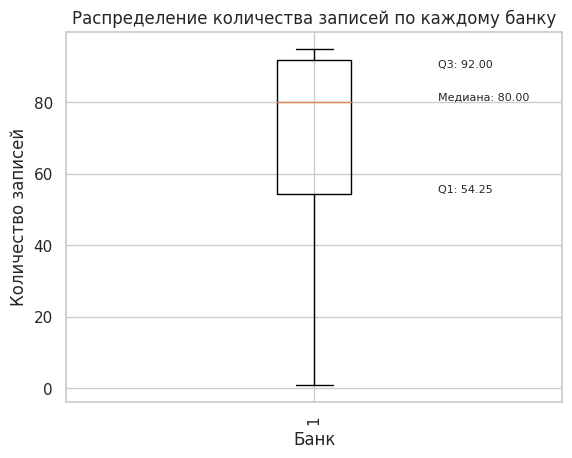

In [ ]:
# Создание диаграммы размаха
plt.boxplot(bank_counts.values)

# Получение статистических параметров
median = bank_counts.median()
q1 = bank_counts.quantile(0.25)
q3 = bank_counts.quantile(0.75)

# Добавление подписей
plt.text(1.25, q1, 'Q1: {:.2f}'.format(q1.item()), ha='left', va='bottom', fontsize=8)
plt.text(1.25, median, 'Медиана: {:.2f}'.format(median.item()), ha='left', va='bottom', fontsize=8)
plt.text(1.25, q3, 'Q3: {:.2f}'.format(q3.item()), ha='left', va='top', fontsize=8)

# Настройка осей и заголовка графика
plt.xlabel('Банк')
plt.ylabel('Количество записей')
plt.title('Распределение количества записей по каждому банку')
plt.xticks(rotation=90)

# Отображение графика
plt.show()

На диаграмме разброса видно, что медианное значение количества записей составляет 80. Q1 (квартиль 1) равен 54.25, а Q3 (квартиль 3) равен 92. Верхний ус графика короткий, что указывает на наличие банков с большим количеством записей и, возможно, выбросами. Нижний ус графика более длинный, что указывает на наличие банков с меньшим количеством записей. Медиана, которая делит ящик, находится ближе к верхней границе (95), что может указывать на наличие банков с большим количеством записей.

В целом, этот график указывает на неравномерное распределение количества записей между различными банками. Это может быть связано с факторами, такими как размер банка или время существования на рынке.



In [ ]:
# Определим минимальное количество записей по банку
min_records = 6  #либо 12 (год)

# Отфильтурем данные с этим условием, и еще добавим, что номер лицензии не может быть равен 0
filtered_df = df[(df['license'] != 0) & (df.groupby('license')['license'].transform('count') >= min_records)]
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70419 entries, 21 to 72438
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   license                      70419 non-null  float64       
 1   date                         70419 non-null  datetime64[ns]
 2   net_assets                   70419 non-null  float64       
 3   ROA                          70419 non-null  float64       
 4   liquid                       70419 non-null  float64       
 5   ibl                          70419 non-null  float64       
 6   stocks                       70419 non-null  float64       
 7   bond                         70419 non-null  float64       
 8   oth_cap                      70419 non-null  float64       
 9   sunk_retail_credit           70419 non-null  float64       
 10  NI                           70419 non-null  float64       
 11  organization_credit          70419 non-n

In [ ]:
print(f"Количество банков сдавших отчетность {min_records} и более раз: {filtered_df['license'].nunique()}" )
print(f"Количество банков сдавших отчетность {min_records} и более раз с ГО в г. Москва или г. Санкт-Петербург: {filtered_df[filtered_df['msk_spb'] == 1]['license'].nunique()}")

Количество банков сдавших отчетность 6 и более раз: 990
Количество банков сдавших отчетность 6 и более раз с ГО в г. Москва или г. Санкт-Петербург: 766


После данной фильтрации в наборе осталось 990 банков и 70419 записи - с этим набором данных продолжим работать

In [ ]:
# Посмотрим изменилось ли количество банков с признаком 'default' и заодно в отдельности по признаку 'msk_spb'
print("Общее количество банков, у которых была отозвана лицензия:", filtered_df[filtered_df['default'] == 1]['license'].nunique())

# Подсчет количества банков с признаком 'msk_spb'
print("Количество банков, у которых была отозвана лицензия с ГО в г. Москва или г. Санкт-Петербург:",
      filtered_df[(filtered_df['default'] == 1) & (filtered_df['msk_spb'] == 1)]['license'].nunique())

Общее количество банков, у которых была отозвана лицензия: 322
Количество банков, у которых была отозвана лицензия с ГО в г. Москва или г. Санкт-Петербург: 220


In [ ]:
# Список столбцов, которые оставим для дальнейшей работы
columns = ['license', 'date', 'net_assets', 'ROA', 'liquid', 'ibl', 'stocks', 'bond',
            'NI', 'organization_credit', 'credit_portf', 'sunk_credit_portf', 'organization_deposit',
           'retail_deposit', 'ROE', 'retail_credit', 'reserv_credit_perc', 'zalog_credit_perc',
           'foreign_na_fr', 'capital', 'msk_spb', 'INF_SA', 'NX_growth',
           'usd_rub_std_diff', 'net_foreign_assets_diff', 'net_gov_debt_diff',
           'other_fin_debt_diff', 'retail_debt_SA_DETREND_diff', 'stocks_capital_diff',
           'i_retail_spread_diff', 'usd_rub_return', 'micex_std', 'miacr_std', 'miacr_diff', 'default']

# Запишем их в новую переменную
new_df = filtered_df[columns].copy()
new_df.head()

,license,date,net_assets,ROA,liquid,ibl,stocks,bond,NI,organization_credit,...,net_gov_debt_diff,other_fin_debt_diff,retail_debt_SA_DETREND_diff,stocks_capital_diff,i_retail_spread_diff,usd_rub_return,micex_std,miacr_std,miacr_diff,default
21,1.0,2010-02-01,508504416.0,171.0,14702926.0,100184560.0,122475.0,22695386.0,733738.0,294754218.0,...,1595305.0,47521.0,33587.30532,214757.0,0.0,0.008065,29.75618,0.724981,-0.830116,0.0
22,1.0,2010-03-01,531541810.0,-76.0,19496836.0,127650004.0,122412.0,23970524.0,11564.0,287311265.0,...,-265831.0,-34392.0,22186.02349,59909.0,-0.1,0.010699,40.07545,0.330918,-0.172562,0.0
23,1.0,2010-04-01,543702382.0,212.0,9531544.0,113551176.0,122876.0,61166860.0,2774307.0,285110233.0,...,430871.0,-21876.0,-14983.52885,4293.0,0.1,-0.019848,23.77384,0.359785,-0.296650,0.0
24,1.0,2010-05-01,538400953.0,116.0,13731578.0,104121444.0,122842.0,58897921.0,2040059.0,289631757.0,...,92737.0,-1075.0,-19523.94108,64243.0,-0.1,-0.012387,25.82706,0.246044,-0.255000,0.0
25,1.0,2010-06-01,544391074.0,120.0,19967098.0,90017894.0,122806.0,63807322.0,2649005.0,294318002.0,...,-134963.0,81.0,-20743.43746,36008.0,0.1,0.042533,53.69817,0.137915,-0.533087,0.0


In [ ]:
# Проверим данные на пропущенные значения
new_df.isna().sum()

license                        0
date                           0
net_assets                     0
ROA                            0
liquid                         0
ibl                            0
stocks                         0
bond                           0
NI                             0
organization_credit            0
credit_portf                   0
sunk_credit_portf              0
organization_deposit           0
retail_deposit                 0
ROE                            0
retail_credit                  0
reserv_credit_perc             0
zalog_credit_perc              0
foreign_na_fr                  0
capital                        0
msk_spb                        0
INF_SA                         0
NX_growth                      0
usd_rub_std_diff               0
net_foreign_assets_diff        0
net_gov_debt_diff              0
other_fin_debt_diff            0
retail_debt_SA_DETREND_diff    0
stocks_capital_diff            0
i_retail_spread_diff           0
usd_rub_re

In [ ]:
new_df.describe()

,license,net_assets,ROA,liquid,ibl,stocks,bond,NI,organization_credit,credit_portf,...,net_gov_debt_diff,other_fin_debt_diff,retail_debt_SA_DETREND_diff,stocks_capital_diff,i_retail_spread_diff,usd_rub_return,micex_std,miacr_std,miacr_diff,default
count,70419.000000,7.041900e+04,70419.000000,7.041900e+04,7.041900e+04,7.041900e+04,7.041900e+04,7.041900e+04,7.041900e+04,7.041900e+04,...,7.041900e+04,7.041900e+04,70419.000000,7.041900e+04,70419.000000,70419.000000,70419.000000,70419.000000,70419.000000,70419.000000
mean,2127.960423,7.242495e+07,122.611753,5.016125e+06,7.704041e+06,6.672673e+05,8.135016e+06,4.427065e+05,3.142048e+07,4.172272e+07,...,6.295720e+03,7.254031e+04,1550.802899,1.329988e+05,-0.034827,0.009292,31.772660,0.380942,0.080007,0.005283
std,1023.746029,7.131449e+08,932.778573,4.458066e+07,6.606301e+07,5.729141e+06,7.494836e+07,9.229220e+06,3.474243e+08,4.626691e+08,...,7.262758e+05,2.145698e+05,48125.496262,7.067810e+05,4.093054,0.049220,16.139031,0.658459,0.817162,0.072490
min,1.000000,0.000000e+00,-64556.000000,0.000000e+00,0.000000e+00,-1.223600e+04,0.000000e+00,-3.518901e+08,0.000000e+00,0.000000e+00,...,-1.634070e+06,-1.790200e+05,-99457.822910,-2.072392e+06,-25.940000,-0.118357,12.592490,0.037417,-1.848351,0.000000
25%,1222.000000,1.289867e+06,14.000000,1.880810e+05,1.584050e+04,0.000000e+00,0.000000e+00,1.066500e+03,3.508200e+05,5.500385e+05,...,-3.686350e+05,-8.200000e+01,-24685.737180,-6.898000e+03,-0.580000,-0.015871,19.975810,0.163503,-0.213459,0.000000
50%,2388.000000,3.638779e+06,91.000000,4.904740e+05,1.770360e+05,0.000000e+00,6.046600e+04,1.156400e+04,1.182426e+06,1.704838e+06,...,-1.732200e+05,3.048400e+04,-1595.165212,4.123900e+04,-0.100000,-0.001414,26.821740,0.293276,0.021180,0.000000
75%,3013.000000,1.363591e+07,214.000000,1.468064e+06,8.004000e+05,1.601100e+04,1.102304e+06,5.996800e+04,4.659576e+06,6.571100e+06,...,1.083395e+05,6.216800e+04,27251.100030,9.782300e+04,0.300000,0.026706,39.720330,0.407155,0.193273,0.000000
max,3481.000000,2.377734e+10,76314.000000,1.814549e+09,2.058386e+09,2.559021e+08,2.453111e+09,6.241876e+08,1.190488e+10,1.603404e+10,...,2.541323e+06,1.839484e+06,127125.057700,5.460819e+06,16.750000,0.206696,87.374570,5.622167,5.257585,1.000000


## Рассчитаем следующие показатели для действующих банков и банков, у которых была отозвана лицензия:

1. 'liquidity_ratio' cоотношение ликвидных активов к чистым активам - показывает долю активов банка, которые могут быть быстро преобразованы в наличные средства для покрытия текущих или краткосрочных обязательств. Служит индикатором финансовой ликвидности и способности банка удовлетворить свои обязательства в коротком сроке.

2. 'retail_deposit_ratio' cоотношение депозитов ФЛ к чистым активам - показывает долю депозитов от физических лиц в общей структуре активов банка. Отражает уровень привлечения розничных клиентов и зависимость банка от розничных депозитов.

3. 'organization_deposit_ratio' cоотношение депозитов ЮЛ к чистым активам - показывает долю депозитов от юридических лиц в общей структуре активов банка. Отражает уровень привлечения корпоративных клиентов и зависимость банка от корпоративных депозитов.

4. 'credit_portf_ratio' cоотношение кредитного портфеля к чистым активам - показывает долю кредитов, предоставленных банком, в общей структуре его активов. Указывает на важность кредитного портфеля в деятельности банка и его роль в генерации доходов и рисков.

5. 'retail_credit_ratio'  cоотношение кредитов ФЛ к чистым активам - показывает долю кредитов, выданных физическим лицам, в общей структуре активов банка. Отражает направленность банка на предоставление кредитов населению и его экспозицию к розничным кредитным рискам.

6. 'organization_credit_ratio' cоотношение кредитов ЮЛ к чистым активам  - показывает долю кредитов, выданных юридическим лицам, в общей структуре активов банка. Отражает направленность банка на предоставление кредитов корпоративным клиентам и его экспозицию к корпоративным кредитным рискам.


7. 'reserv_credit_portf_ratio' cоотношение процента резерва кредитов к общей сумме кредитного портфеля - показывает долю средств, выделенных банком на формирование резервов, для покрытия возможных кредитных потерь. Отражает уровень осторожности и способность банка управлять кредитным риском.

8. 'reserv_credit_net_assets' cоотношение процента резерва кредитов к чистым активам - показывает долю сформированных резервов относительно общих активов банка. Выступает показателем уровня финансовой стабильности и готовности банка к снижению степени риска и потенциальным убыткам

9. 'stocks_net_assets' - доля акций в структуре активов банка

10. bond_net_assets - доля облигаций в структуре активов банка

11. 'loans_ratio' Коэффициент кредитования - отношение заемных средств к общим активам банка. Этот показатель может отражать уровень риска, связанного с заемными средствами.

12. 'foreign_assets_ratio' Доля иностранных активов от общих активов

In [ ]:
# Удаляем строки с нулевыми значениями в столбце 'net_assets' И 'credit_portf'
new_df = new_df[(new_df['net_assets'] != 0) & (new_df['credit_portf'] != 0)]
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68068 entries, 21 to 72438
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   license                      68068 non-null  float64       
 1   date                         68068 non-null  datetime64[ns]
 2   net_assets                   68068 non-null  float64       
 3   ROA                          68068 non-null  float64       
 4   liquid                       68068 non-null  float64       
 5   ibl                          68068 non-null  float64       
 6   stocks                       68068 non-null  float64       
 7   bond                         68068 non-null  float64       
 8   NI                           68068 non-null  float64       
 9   organization_credit          68068 non-null  float64       
 10  credit_portf                 68068 non-null  float64       
 11  sunk_credit_portf            68068 non-n

In [ ]:
# Рассчитываем показатели
new_df['liquidity_ratio'] = new_df['liquid'] / new_df['net_assets']
new_df['retail_deposit_ratio'] = new_df['retail_deposit'] / new_df['net_assets']
new_df['organization_deposit_ratio'] = new_df['organization_deposit'] / new_df['net_assets']
new_df['credit_portf_ratio'] = new_df['credit_portf'] / new_df['net_assets']
new_df['retail_credit_ratio'] = new_df['retail_credit'] / new_df['net_assets']
new_df['organization_credit_ratio'] = new_df['organization_credit'] / new_df['net_assets']
new_df['reserv_credit_portf_ratio'] = new_df['reserv_credit_perc'] / new_df['credit_portf']
new_df['reserv_credit_net_assets'] = new_df['reserv_credit_perc'] / new_df['net_assets']
new_df['stocks_net_assets'] = new_df['stocks'] / new_df['net_assets']
new_df['bond_net_assets'] = new_df['bond'] / new_df['net_assets']
new_df['loans_ratio'] = new_df['ibl'] / new_df['net_assets']
new_df['foreign_assets_ratio'] = new_df['foreign_na_fr'] / new_df['net_assets']

# Выводим только новые столбцы
new_columns = ['liquidity_ratio', 'retail_deposit_ratio', 'organization_deposit_ratio',
               'credit_portf_ratio', 'retail_credit_ratio', 'organization_credit_ratio',
               'reserv_credit_portf_ratio', 'reserv_credit_net_assets', 'stocks_net_assets',
               'bond_net_assets', 'loans_ratio', 'foreign_assets_ratio']
new_df[new_columns].head()

,liquidity_ratio,retail_deposit_ratio,organization_deposit_ratio,credit_portf_ratio,retail_credit_ratio,organization_credit_ratio,reserv_credit_portf_ratio,reserv_credit_net_assets,stocks_net_assets,bond_net_assets,loans_ratio,foreign_assets_ratio
21,0.028914,0.070441,0.429963,0.695181,0.115531,0.579649,0.000003,0.000002,0.000241,0.044632,0.197018,0.000004
22,0.036680,0.067469,0.428323,0.648937,0.108412,0.540524,0.000003,0.000002,0.000230,0.045096,0.240150,0.000004
23,0.017531,0.065762,0.386466,0.003136,0.103969,0.524387,0.000642,0.000002,0.000226,0.112501,0.208848,0.000004
24,0.025504,0.068327,0.382518,0.642647,0.104699,0.537948,0.000003,0.000002,0.000228,0.109394,0.193390,0.000004
25,0.036678,0.069167,0.397746,0.645917,0.105280,0.540637,0.000003,0.000002,0.000226,0.117209,0.165355,0.000004


In [ ]:
print("Количество банков в наборе данных:", new_df['license'].nunique())

Количество банков в наборе данных: 982


In [ ]:
print("Количество банков, у которых была отозвана лицензия:", new_df[new_df['default'] == 1]['license'].nunique())

Количество банков, у которых была отозвана лицензия: 311


## Сгруппируем записи по средним значениям финансовых показателей за каждый год для каждого банка

In [ ]:
# Сгруппируем данные по уникальному номеру банка и году, рассчитаем средние значения, стандартное отклонение, дисперсию и медиану
group_df = new_df.groupby(['license', new_df['date'].dt.year]).agg({'ROA': 'mean', 'ROE': 'mean', 'liquidity_ratio': 'mean',
                                                                    'retail_deposit_ratio': 'mean', 'organization_deposit_ratio': 'mean',
                                                                    'credit_portf_ratio': 'mean', 'retail_credit_ratio': 'mean',
                                                                    'organization_credit_ratio': 'mean', 'reserv_credit_portf_ratio': 'mean',
                                                                    'reserv_credit_net_assets': 'mean','stocks_net_assets': 'mean',
                                                                    'bond_net_assets': 'mean', 'loans_ratio': 'mean', 'foreign_assets_ratio': 'mean',
                                                                    'NX_growth': 'mean','NI': 'mean', 'INF_SA': 'mean',
                                                                    'usd_rub_std_diff': 'mean', 'usd_rub_return': 'mean',  'net_gov_debt_diff': 'mean',
                                                                    'other_fin_debt_diff': 'mean', 'retail_debt_SA_DETREND_diff': 'mean',
                                                                    'stocks_capital_diff': 'mean', 'i_retail_spread_diff': 'mean', 'micex_std': 'mean',
                                                                    'miacr_std': 'mean', 'miacr_diff': 'mean', 'msk_spb': 'max','default': 'max'})


# Удаляем иерархическую индексацию и сохраняем столбцы 'license' и 'default'
group_df.reset_index(inplace=True)

group_df.columns = ['license', 'date', 'ROA', 'ROE', 'liquidity_ratio', 'retail_deposit_ratio',
                    'organization_deposit_ratio', 'credit_portf_ratio', 'retail_credit_ratio',
                    'organization_credit_ratio', 'reserv_credit_portf_ratio', 'reserv_credit_net_assets',
                    'stocks_net_assets', 'bond_net_assets', 'loans_ratio', 'foreign_assets_ratio',
                     'NX_growth', 'NI', 'INF_SA', 'usd_rub_std_diff', 'usd_rub_return', 'net_gov_debt_diff',
                    'other_fin_debt_diff', 'retail_debt_SA_DETREND_diff', 'stocks_capital_diff',
                    'i_retail_spread_diff', 'micex_std', 'miacr_std', 'miacr_diff', 'msk_spb', 'default']


In [ ]:
group_df.info()
group_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6283 entries, 0 to 6282
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   license                      6283 non-null   float64
 1   date                         6283 non-null   int64  
 2   ROA                          6283 non-null   float64
 3   ROE                          6283 non-null   float64
 4   liquidity_ratio              6283 non-null   float64
 5   retail_deposit_ratio         6283 non-null   float64
 6   organization_deposit_ratio   6283 non-null   float64
 7   credit_portf_ratio           6283 non-null   float64
 8   retail_credit_ratio          6283 non-null   float64
 9   organization_credit_ratio    6283 non-null   float64
 10  reserv_credit_portf_ratio    6283 non-null   float64
 11  reserv_credit_net_assets     6283 non-null   float64
 12  stocks_net_assets            6283 non-null   float64
 13  bond_net_assets   

,license,date,ROA,ROE,liquidity_ratio,retail_deposit_ratio,organization_deposit_ratio,credit_portf_ratio,retail_credit_ratio,organization_credit_ratio,...,net_gov_debt_diff,other_fin_debt_diff,retail_debt_SA_DETREND_diff,stocks_capital_diff,i_retail_spread_diff,micex_std,miacr_std,miacr_diff,msk_spb,default
0,1.0,2010,124.909091,962.818182,0.029582,0.066212,0.385368,0.531002,0.095814,0.541108,...,154963.000000,7075.636364,3115.113433,51746.363636,0.018182,29.149009,0.301264,-0.163595,1.0,0.0
1,1.0,2011,243.692308,2083.384615,0.026688,0.058714,0.363031,0.574787,0.095358,0.479429,...,-135065.000000,41181.538462,-470.826033,52105.769231,-0.192308,39.288609,0.270918,0.153542,1.0,0.0
2,1.0,2012,203.166667,1958.166667,0.030576,0.062014,0.416794,0.551729,0.000269,0.440839,...,-58328.166667,27499.083333,-1092.698230,150961.500000,0.175000,29.405152,0.382100,0.088690,1.0,0.0
3,1.0,2013,153.416667,1093.416667,0.044390,0.078975,0.408421,0.646118,0.000282,0.494136,...,-20407.250000,27122.333333,496.624176,32820.083333,-0.100000,23.948508,0.255984,0.007119,1.0,0.0
4,1.0,2014,173.666667,1187.083333,0.043798,0.076533,0.402098,0.639867,0.000240,0.478755,...,-74737.416667,79362.750000,1825.945058,64615.250000,-2.938333,29.216628,0.370190,0.333926,1.0,0.0


In [ ]:
# Получение списка банков с записью 'default' = 1
banks_with_default = group_df[group_df['default'] == 1]['license'].unique()

# Вывод списка банков
print(list(banks_with_default))

[5.0, 18.0, 55.0, 107.0, 138.0, 142.0, 153.0, 155.0, 184.0, 208.0, 210.0, 226.0, 282.0, 286.0, 347.0, 370.0, 385.0, 391.0, 415.0, 456.0, 466.0, 467.0, 507.0, 545.0, 546.0, 568.0, 588.0, 604.0, 609.0, 622.0, 635.0, 637.0, 650.0, 654.0, 665.0, 708.0, 709.0, 752.0, 766.0, 783.0, 784.0, 812.0, 817.0, 825.0, 826.0, 854.0, 857.0, 874.0, 880.0, 903.0, 917.0, 963.0, 970.0, 990.0, 992.0, 1000.0, 1003.0, 1006.0, 1019.0, 1027.0, 1052.0, 1067.0, 1068.0, 1073.0, 1114.0, 1115.0, 1134.0, 1166.0, 1184.0, 1189.0, 1197.0, 1239.0, 1242.0, 1244.0, 1276.0, 1284.0, 1312.0, 1317.0, 1352.0, 1376.0, 1470.0, 1557.0, 1581.0, 1608.0, 1614.0, 1623.0, 1659.0, 1661.0, 1663.0, 1671.0, 1673.0, 1675.0, 1701.0, 1705.0, 1720.0, 1724.0, 1751.0, 1781.0, 1788.0, 1792.0, 1809.0, 1810.0, 1868.0, 1869.0, 1909.0, 1910.0, 1920.0, 1926.0, 1939.0, 1942.0, 1946.0, 1948.0, 1956.0, 1967.0, 1972.0, 1973.0, 1978.0, 1982.0, 1988.0, 1991.0, 2029.0, 2050.0, 2053.0, 2063.0, 2065.0, 2071.0, 2090.0, 2098.0, 2136.0, 2142.0, 2145.0, 2152.0, 21

In [ ]:
# Записи по дефолтному банку
filter_df = group_df[group_df['license'] == 18]
count = len(filter_df)
print("Количество записей по банку с номером лицензии 18:", count)
filter_df[['default', 'date']]

Количество записей по банку с номером лицензии 18: 5


,default,date
23,0.0,2010
24,0.0,2011
25,0.0,2012
26,0.0,2013
27,1.0,2014


In [ ]:
# Создание списка номеров лицензий банков
license_list = [5.0, 18.0, 55.0, 107.0, 138.0, 142.0, 153.0, 155.0, 184.0, 208.0, 210.0,
              226.0, 282.0, 286.0, 347.0, 370.0, 385.0, 391.0, 415.0, 456.0, 466.0, 467.0,
              507.0, 545.0, 546.0, 568.0, 588.0, 604.0, 609.0, 622.0, 635.0, 637.0, 650.0,
              654.0, 665.0, 708.0, 709.0, 752.0, 766.0, 783.0, 784.0, 812.0, 817.0, 825.0,
              826.0, 854.0, 857.0, 874.0, 880.0, 903.0, 917.0, 963.0, 970.0, 990.0, 992.0,
              1000.0, 1003.0, 1006.0, 1019.0, 1027.0, 1052.0, 1067.0, 1068.0, 1073.0, 1114.0,
              1115.0, 1134.0, 1166.0, 1184.0, 1189.0, 1197.0, 1239.0, 1242.0, 1244.0, 1276.0,
              1284.0, 1312.0, 1317.0, 1352.0, 1376.0, 1470.0, 1557.0, 1581.0, 1608.0, 1614.0,
              1623.0, 1659.0, 1661.0, 1663.0, 1671.0, 1673.0, 1675.0, 1701.0, 1720.0, 1724.0,
              1751.0, 1781.0, 1788.0, 1792.0, 1809.0, 1810.0, 1868.0, 1869.0, 1909.0, 1910.0,
              1920.0, 1926.0, 1939.0, 1942.0, 1946.0, 1948.0, 1956.0, 1967.0, 1972.0, 1973.0,
              1978.0, 1982.0, 1988.0, 1991.0, 2029.0, 2050.0, 2053.0, 2063.0, 2065.0, 2071.0,
              2090.0, 2098.0, 2136.0, 2142.0, 2145.0, 2152.0, 2156.0, 2157.0, 2207.0, 2208.0,
              2209.0, 2211.0, 2245.0, 2258.0, 2264.0, 2269.0, 2270.0, 2304.0, 2306.0, 2307.0,
              2312.0, 2330.0, 2364.0, 2368.0, 2398.0, 2401.0, 2403.0, 2425.0, 2433.0, 2435.0,
              2436.0, 2462.0, 2494.0, 2507.0, 2518.0, 2519.0, 2529.0, 2534.0, 2546.0, 2551.0,
              2557.0, 2559.0, 2562.0, 2571.0, 2574.0, 2581.0, 2590.0, 2594.0, 2598.0, 2602.0,
              2605.0, 2617.0, 2626.0, 2632.0, 2644.0, 2647.0, 2654.0, 2672.0, 2673.0, 2682.0,
              2684.0, 2697.0, 2704.0, 2707.0, 2721.0, 2749.0, 2756.0, 2761.0, 2763.0, 2764.0,
              2767.0, 2768.0, 2769.0, 2771.0, 2772.0, 2782.0, 2789.0, 2793.0, 2803.0, 2827.0,
              2829.0, 2837.0, 2838.0, 2849.0, 2868.0, 2873.0, 2877.0, 2880.0, 2883.0, 2888.0,
              2890.0, 2900.0, 2902.0, 2903.0, 2905.0, 2913.0, 2914.0, 2922.0, 2923.0, 2939.0,
              2944.0, 2949.0, 2964.0, 2966.0, 2983.0, 2998.0, 3001.0, 3010.0, 3011.0, 3013.0,
              3015.0, 3016.0, 3028.0, 3030.0, 3036.0, 3037.0, 3038.0, 3052.0, 3062.0, 3065.0,
              3071.0, 3073.0, 3084.0, 3089.0, 3105.0, 3115.0, 3117.0, 3122.0, 3128.0, 3139.0,
              3154.0, 3171.0, 3173.0, 3175.0, 3177.0, 3180.0, 3190.0, 3203.0, 3209.0, 3229.0,
              3233.0, 3234.0, 3238.0, 3245.0, 3250.0, 3251.0, 3252.0, 3256.0, 3257.0, 3262.0,
              3265.0, 3292.0, 3294.0, 3295.0, 3314.0, 3318.0, 3324.0, 3330.0, 3333.0, 3339.0,
              3340.0, 3343.0, 3354.0, 3365.0, 3367.0, 3368.0, 3371.0, 3378.0, 3390.0, 3397.0,
              3398.0, 3403.0, 3404.0, 3415.0, 3417.0, 3420.0, 3422.0, 3434.0, 3436.0, 3439.0,
              3450.0, 3459.0, 3463.0, 3468.0, 3470.0]

# Сохраним в переменной banks_with_default все записи по банкам, которые имели признак 'default'
defaulted_banks = group_df[group_df['license'].isin(license_list)]

# Создание датафрейма для остальных банков
active_banks = group_df[~group_df['license'].isin(license_list)]

defaulted_banks

,license,date,ROA,ROE,liquidity_ratio,retail_deposit_ratio,organization_deposit_ratio,credit_portf_ratio,retail_credit_ratio,organization_credit_ratio,...,net_gov_debt_diff,other_fin_debt_diff,retail_debt_SA_DETREND_diff,stocks_capital_diff,i_retail_spread_diff,micex_std,miacr_std,miacr_diff,msk_spb,default
16,5.0,2010,42.000000,472.636364,0.123778,0.322335,0.537002,0.298652,0.033349,0.273699,...,154963.000000,7075.636364,3115.113433,51746.363636,0.018182,29.149009,0.301264,-0.163595,1.0,0.0
17,5.0,2011,69.083333,755.666667,0.097788,0.323270,0.547035,0.459383,0.037856,0.421527,...,-129436.416667,42073.000000,-1198.357898,55656.083333,-0.175000,40.706202,0.290376,0.168254,1.0,0.0
18,5.0,2012,92.000000,1051.916667,0.129230,0.364957,0.493743,0.541032,0.029572,0.507314,...,-58328.166667,27499.083333,-1092.698230,150961.500000,0.175000,29.405152,0.382100,0.088690,1.0,0.0
19,5.0,2013,219.583333,2133.750000,0.127091,0.363590,0.453066,0.605298,0.025364,0.532545,...,-20407.250000,27122.333333,496.624176,32820.083333,-0.100000,23.948508,0.255984,0.007119,1.0,0.0
20,5.0,2014,94.666667,933.666667,0.135489,0.367995,0.339131,0.537924,0.021785,0.436631,...,-74737.416667,79362.750000,1825.945058,64615.250000,-2.938333,29.216628,0.370190,0.333926,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,3470.0,2013,311.428571,462.000000,0.096760,0.000000,0.323148,0.553051,0.548374,0.539589,...,-228940.857143,134231.142857,14648.680415,-6869.857143,-0.067143,25.999030,0.221518,0.061422,1.0,0.0
6251,3470.0,2014,1401.916667,1490.416667,0.080821,0.000000,0.673207,0.876543,0.140224,0.876543,...,-41968.833333,68891.083333,-263.217359,87955.333333,-2.601667,25.411324,0.280941,0.161316,0.0,0.0
6252,3470.0,2015,540.545455,2338.272727,0.133743,0.058171,0.696264,0.733430,0.080751,0.733430,...,-119370.090909,71326.636364,1643.943489,515112.636364,3.274545,46.368489,1.343718,1.034741,0.0,0.0
6253,3470.0,2016,-616.500000,-1901.166667,0.082423,0.000000,0.541945,0.809852,0.109314,0.809852,...,213224.250000,62070.583333,10387.783881,304247.750000,0.621667,31.139564,0.331103,-0.247464,0.0,0.0


## Если проставим признак 'default' для всех записей банков, которые банкротились, и сгруппируем по номеру лицензии

In [ ]:
# Отметим все записи по дефолтным банкам
defaulted_banks['default'] = 1.0
defaulted_banks[['default', 'license', 'date']]

<ipython-input-297-235368cb03d9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defaulted_banks['default'] = 1.0


,default,license,date
16,1.0,5.0,2010
17,1.0,5.0,2011
18,1.0,5.0,2012
19,1.0,5.0,2013
20,1.0,5.0,2014
...,...,...,...
6250,1.0,3470.0,2013
6251,1.0,3470.0,2014
6252,1.0,3470.0,2015
6253,1.0,3470.0,2016


In [ ]:
# Группировка по банку и рассчитывание средних значений для каждого показателя
columns = ['ROA', 'ROE', 'liquidity_ratio', 'retail_deposit_ratio', 'organization_deposit_ratio',
           'credit_portf_ratio', 'retail_credit_ratio', 'organization_credit_ratio',
           'reserv_credit_portf_ratio', 'reserv_credit_net_assets', 'stocks_net_assets',
           'bond_net_assets', 'loans_ratio', 'foreign_assets_ratio', 'NX_growth', 'NI',
           'INF_SA', 'usd_rub_std_diff', 'usd_rub_return',  'net_gov_debt_diff', 'other_fin_debt_diff',
           'retail_debt_SA_DETREND_diff', 'stocks_capital_diff', 'i_retail_spread_diff', 'micex_std',
           'miacr_std', 'miacr_diff', 'msk_spb']

# Группировка записей по номеру лицензии и рассчет средних значений только для выбранных показателей
active_banks_mean = active_banks.groupby('license')[columns + ['default']].agg({'default': 'max', **{col: 'mean' for col in columns}})
defaulted_banks_mean = defaulted_banks.groupby('license')[columns + ['default']].agg({'default': 'max', **{col: 'mean' for col in columns}})

In [ ]:
defaulted_banks_mean

,default,ROA,ROE,liquidity_ratio,retail_deposit_ratio,organization_deposit_ratio,credit_portf_ratio,retail_credit_ratio,organization_credit_ratio,reserv_credit_portf_ratio,...,usd_rub_return,net_gov_debt_diff,other_fin_debt_diff,retail_debt_SA_DETREND_diff,stocks_capital_diff,i_retail_spread_diff,micex_std,miacr_std,miacr_diff,msk_spb
license,,,,,,,,,,,,,,,,,,,,,
5.0,1.0,65.460884,647.942950,0.118156,0.386923,0.410643,0.493134,0.028552,0.423783,0.000304,...,0.010814,45317.178571,66805.560297,2536.866788,185095.461812,0.083210,31.844191,0.385270,0.060468,1.000000
18.0,1.0,33.939394,298.486364,0.074071,0.404077,0.230827,0.403476,0.055342,0.307969,0.000144,...,0.007040,61353.366667,18403.943939,199.421240,90029.206061,-1.917697,28.610442,0.311678,0.006060,1.000000
55.0,1.0,-59.167929,-689.495265,0.173610,0.456299,0.193435,0.668219,0.045619,0.552780,0.000192,...,0.009937,21087.107323,69406.278409,426.090107,135577.636048,0.119883,32.120928,0.407499,0.086298,1.000000
107.0,1.0,136.511364,1199.123106,0.055532,0.541588,0.204318,0.582589,0.010980,0.578988,0.000062,...,0.002194,-15164.257576,26170.890152,324.176587,73063.765152,-0.021970,30.752204,0.306191,0.029416,0.750000
138.0,1.0,-9.537879,-534.246212,0.106499,0.515206,0.287817,0.538389,0.042921,0.363540,0.001463,...,0.014595,34323.878788,45204.652778,2273.482609,179234.489899,-0.018460,33.059759,0.398053,0.064795,0.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3450.0,1.0,524.416667,-94.140873,0.206617,0.029673,0.544252,1.094869,0.104941,0.652704,0.000882,...,0.005529,-26298.365079,111439.285714,-29864.137636,13382.283730,-0.476190,30.593932,0.315942,0.031261,1.000000
3459.0,1.0,535.437500,790.199405,0.102891,0.019460,0.209050,0.408877,0.069717,0.376952,0.002158,...,0.013464,-114100.401786,124227.541667,11470.074191,119571.953869,0.228006,33.363422,0.434097,0.058888,1.000000
3463.0,1.0,-68.711760,-214.440296,0.180749,0.832002,0.198943,0.700622,2.256078,0.644851,0.010159,...,0.016093,-72179.109307,49485.330267,250.540794,191284.901876,0.427466,36.676117,0.576131,0.333134,1.000000


## Проведем непараметрический тест для независимых выборок с использованием U-критерия Манн-Уинти

Гипотеза

* H0: Средние выборок одинаковы.
* H1: Средние выборок различаются.

In [ ]:
from scipy.stats import mannwhitneyu

# Показатели, для которых мы хотим провести тест
indicators = ['ROA', 'ROE', 'liquidity_ratio', 'retail_deposit_ratio', 'organization_deposit_ratio',
              'credit_portf_ratio', 'retail_credit_ratio', 'organization_credit_ratio',
              'reserv_credit_portf_ratio', 'reserv_credit_net_assets', 'stocks_net_assets',
              'bond_net_assets', 'loans_ratio', 'foreign_assets_ratio']

# Проводим тест Манна-Уитни для каждого показателя
for indicator in indicators:
    stat, p_value = mannwhitneyu(active_banks_mean[indicator], defaulted_banks_mean[indicator], alternative='two-sided')

    print(f"Показатель: {indicator}")
    print(f"Статистика = {stat:.3f}, p = {p_value:.3f}")

    if p_value > 0.05:
      print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые\n')
    else:
      print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются\n')

print("-------------------------------------")

Показатель: ROA
Статистика = 118291.000, p = 0.001
Отклоняем нулевую гипотезу, распределения, вероятно, различаются

Показатель: ROE
Статистика = 115454.000, p = 0.006
Отклоняем нулевую гипотезу, распределения, вероятно, различаются

Показатель: liquidity_ratio
Статистика = 91308.000, p = 0.002
Отклоняем нулевую гипотезу, распределения, вероятно, различаются

Показатель: retail_deposit_ratio
Статистика = 95219.000, p = 0.030
Отклоняем нулевую гипотезу, распределения, вероятно, различаются

Показатель: organization_deposit_ratio
Статистика = 101079.000, p = 0.456
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые

Показатель: credit_portf_ratio
Статистика = 97456.000, p = 0.105
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые

Показатель: retail_credit_ratio
Статистика = 87187.000, p = 0.000
Отклоняем нулевую гипотезу, распределения, вероятно, различаются

Показатель: organization_credit_ratio
Статистика = 95097.000, p = 0.028
Отклоняем нулевую гипотезу

Значения статистики и p-value, указывают на результаты теста Манна-Уитни для каждого показателя.

На основе этих результатов можно сделать вывод, что большинство показателей имеют статистически значимые различия между действующими банками и банками с отозванной лицензией, за исключением показателей
organization_deposit_ratio, credit_portf_ratio,  bond_net_assets.

Учитывая результаты теста, можно отметить эти различия и использовать значимые показатели для дальнейшего анализа и прогнозирования банкротства банков.

In [ ]:
# Объединение двух датафреймов в один
banks = pd.concat([active_banks_mean, defaulted_banks_mean])

# Вывод объединенного датафрейма
banks.head(3)

,default,ROA,ROE,liquidity_ratio,retail_deposit_ratio,organization_deposit_ratio,credit_portf_ratio,retail_credit_ratio,organization_credit_ratio,reserv_credit_portf_ratio,...,usd_rub_return,net_gov_debt_diff,other_fin_debt_diff,retail_debt_SA_DETREND_diff,stocks_capital_diff,i_retail_spread_diff,micex_std,miacr_std,miacr_diff,msk_spb
license,,,,,,,,,,,,,,,,,,,,,
1.0,0.0,165.783508,1322.995994,0.043986,0.089967,0.431694,0.590177,0.024062,0.488900,0.000016,...,0.007820,20781.269886,78771.744391,2155.274072,130192.086684,-0.047466,31.553767,0.353694,0.034419,1.0
2.0,0.0,192.194129,468.458333,0.097980,0.161528,0.281354,0.752203,0.086009,0.700565,0.001786,...,0.008319,22840.041667,78074.360795,2329.684828,124802.993371,-0.048352,31.440883,0.351886,0.031416,1.0
21.0,0.0,29.041667,370.968750,0.297320,0.254950,0.430544,0.521688,0.160857,0.325838,0.002655,...,0.011992,-354.531250,79318.635417,3732.535496,118075.625000,0.139792,31.070506,0.414416,0.119437,0.0


In [ ]:
# Проверим данные на пропущенные значения
banks.isna().sum()

default                        0
ROA                            0
ROE                            0
liquidity_ratio                0
retail_deposit_ratio           0
organization_deposit_ratio     0
credit_portf_ratio             0
retail_credit_ratio            0
organization_credit_ratio      0
reserv_credit_portf_ratio      0
reserv_credit_net_assets       0
stocks_net_assets              0
bond_net_assets                0
loans_ratio                    0
foreign_assets_ratio           0
NX_growth                      0
NI                             0
INF_SA                         0
usd_rub_std_diff               0
usd_rub_return                 0
net_gov_debt_diff              0
other_fin_debt_diff            0
retail_debt_SA_DETREND_diff    0
stocks_capital_diff            0
i_retail_spread_diff           0
micex_std                      0
miacr_std                      0
miacr_diff                     0
msk_spb                        0
dtype: int64

In [ ]:
# Подсчет количества банков, обанкротившихся
print("Количество записей по обанкротившимся банкам:", banks['default'].sum())

Количество записей по обанкротившимся банкам: 311.0


##RandomForest

In [ ]:
from sklearn.model_selection import train_test_split
# Выделим признаки и целевую переменную в новые переменные:
significant_features = ['ROA', 'ROE', 'liquidity_ratio', 'retail_deposit_ratio',
                        'retail_credit_ratio', 'organization_credit_ratio',
                        'reserv_credit_portf_ratio', 'reserv_credit_net_assets', 'stocks_net_assets',
                        'loans_ratio', 'foreign_assets_ratio', 'NX_growth', 'NI',
                        'INF_SA',  'usd_rub_std_diff', 'usd_rub_return',  'net_gov_debt_diff',
                        'other_fin_debt_diff', 'retail_debt_SA_DETREND_diff',
                        'stocks_capital_diff', 'i_retail_spread_diff', 'micex_std',
                        'miacr_std', 'miacr_diff', 'msk_spb']

X = banks[significant_features]
y = banks['default']

# Разделим данные на тренировочный и тестовый наборы и обучите модель Random Forest:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(f'Количество признаков: {len(significant_features)}')

Количество признаков: 25


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Фиксируем время старта работы кода
start = time.time()

# Создание и обучение модели RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

#фиксируем время окончания работы кода
finish = time.time()

# вычитаем время старта из времени окончания и получаем результат в миллисекундах
res = finish - start
res_msec = res * 1000
print('Время работы в миллисекундах: ', res_msec)

Время работы в миллисекундах:  618.3769702911377


In [ ]:
# Предсказание на тестовом наборе
y_pred = rf.predict(X_test)

# Оценка производительности модели
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8071065989847716

Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87       138
         1.0       0.71      0.59      0.65        59

    accuracy                           0.81       197
   macro avg       0.78      0.75      0.76       197
weighted avg       0.80      0.81      0.80       197



In [ ]:
from sklearn.metrics import roc_auc_score
# Оценка AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred)
print("AUC-ROC:", auc_roc)

AUC-ROC: 0.745885531810366


,Feature,Importance
24,msk_spb,0.018744
15,usd_rub_return,0.026415
5,organization_credit_ratio,0.026688
21,micex_std,0.028032
12,NI,0.028245
4,retail_credit_ratio,0.029232
3,retail_deposit_ratio,0.031029
1,ROE,0.031137
2,liquidity_ratio,0.032274
11,NX_growth,0.032437


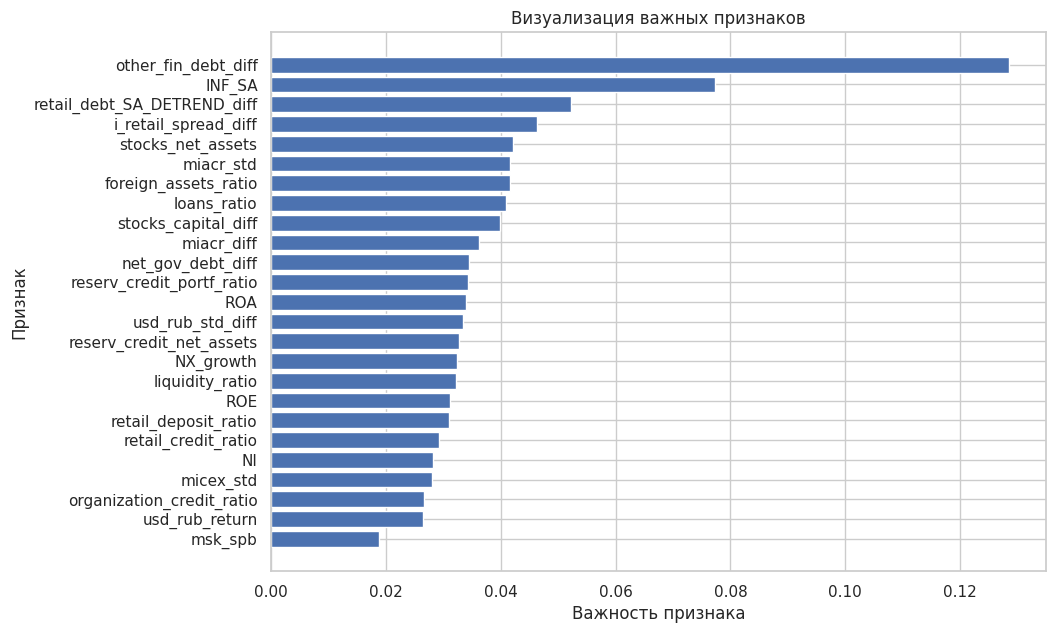

In [ ]:
# Вычисление важности признаков
feature_importance = rf.feature_importances_
feature_names = significant_features

# Создание датафрейма с важностью признаков
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Отображение значений важности в виде таблицы параметр-значение
display(feature_importance_df)

# Создание столбчатой диаграммы важности признаков
plt.figure(figsize=(10, 7))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], align='center')
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.title('Визуализация важных признаков')

plt.show()

##XGBoost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Выделим признаки и целевую переменную в новые переменные:
significant_features = ['ROA', 'ROE', 'liquidity_ratio', 'retail_deposit_ratio',
                        'retail_credit_ratio', 'organization_credit_ratio',
                        'reserv_credit_portf_ratio', 'reserv_credit_net_assets', 'stocks_net_assets',
                        'loans_ratio', 'foreign_assets_ratio', 'NX_growth', 'NI',
                        'INF_SA',  'usd_rub_std_diff', 'usd_rub_return',  'net_gov_debt_diff',
                        'other_fin_debt_diff', 'retail_debt_SA_DETREND_diff',
                        'stocks_capital_diff', 'i_retail_spread_diff', 'micex_std',
                        'miacr_std', 'miacr_diff', 'msk_spb']

X = banks[significant_features]
y = banks['default']

# Разделим данные на тренировочный и тестовый наборы и обучите модель Random Forest:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(f'Количество признаков: {len(significant_features)}')

Количество признаков: 25


In [ ]:
# Фиксируем время старта работы кода
start = time.time()

# Инициализация и обучение модели XGBoost
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

#фиксируем время окончания работы кода
finish = time.time()

# вычитаем время старта из времени окончания и получаем результат в миллисекундах
res = finish - start
res_msec = res * 1000
print('Время работы в миллисекундах: ', res_msec)

Время работы в миллисекундах:  297.6963520050049


In [ ]:
# Предсказание на проверочном наборе
y_pred = xgb_model.predict(X_test)

# Оценка производительности модели
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7969543147208121

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86       138
         1.0       0.66      0.66      0.66        59

    accuracy                           0.80       197
   macro avg       0.76      0.76      0.76       197
weighted avg       0.80      0.80      0.80       197



In [ ]:
from sklearn.metrics import roc_auc_score
# Оценка AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred)
print("AUC-ROC:", auc_roc)

AUC-ROC: 0.7580447064603292


,Feature,Importance
12,NI,0.014631
15,usd_rub_return,0.019432
5,organization_credit_ratio,0.021734
1,ROE,0.026801
20,i_retail_spread_diff,0.028207
18,retail_debt_SA_DETREND_diff,0.029389
2,liquidity_ratio,0.029924
19,stocks_capital_diff,0.030088
3,retail_deposit_ratio,0.030929
11,NX_growth,0.032339


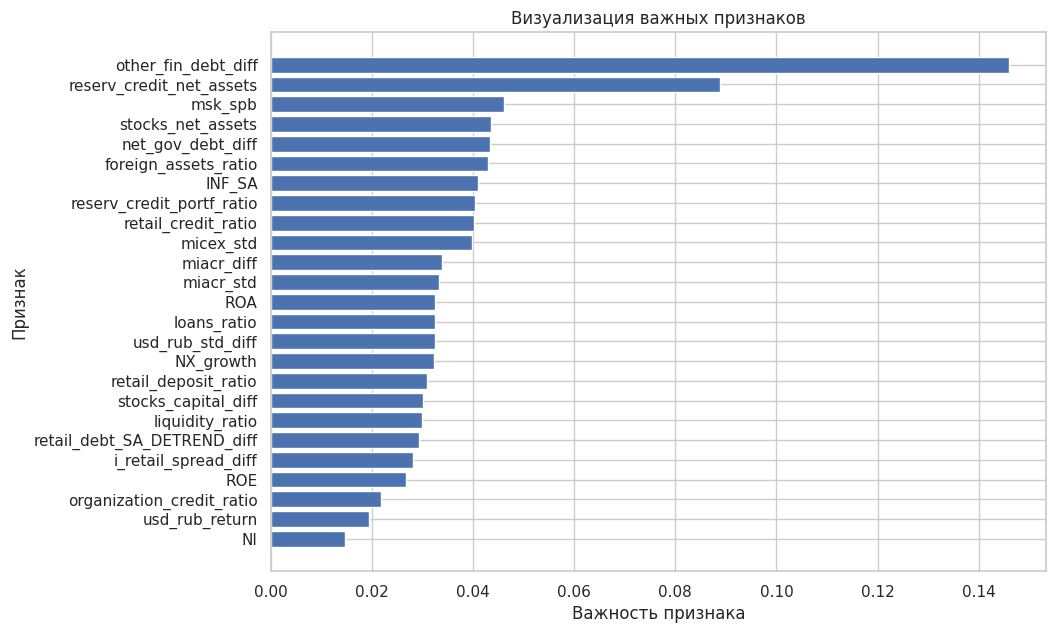

In [ ]:
# Вычисление важности признаков
feature_importance = xgb_model.feature_importances_
feature_names = significant_features

# Создание датафрейма с важностью признаков
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Отображение значений важности в виде таблицы параметр-значение
display(feature_importance_df)

# Создание столбчатой диаграммы важности признаков
plt.figure(figsize=(10, 7))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], align='center')
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.title('Визуализация важных признаков')

plt.show()

## Если сгруппируем данные по номеру лицензии и году, т.е. каждый банк в каждый год считается отдельным наблюдением (псевдопанельная структура)

##RandomForest

In [ ]:
from sklearn.model_selection import train_test_split

# Выделим признаки и целевую переменную в новые переменные:
significant_features = ['ROA', 'ROE', 'liquidity_ratio', 'retail_deposit_ratio',
                        'retail_credit_ratio', 'organization_credit_ratio',
                        'reserv_credit_portf_ratio', 'reserv_credit_net_assets', 'stocks_net_assets',
                        'loans_ratio', 'foreign_assets_ratio', 'NX_growth', 'NI',
                        'INF_SA',  'usd_rub_std_diff', 'usd_rub_return',  'net_gov_debt_diff',
                        'other_fin_debt_diff', 'retail_debt_SA_DETREND_diff',
                        'stocks_capital_diff', 'i_retail_spread_diff', 'micex_std',
                        'miacr_std', 'miacr_diff', 'msk_spb']

X = group_df[significant_features]
y = group_df['default']

# Разделим данные на тренировочный и тестовый наборы и обучим модель Random Forest:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print(f'Количество признаков: {len(significant_features)}')

Количество признаков: 25


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Фиксируем время старта работы кода
start = time.time()

# Создание и обучение модели RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

#фиксируем время окончания работы кода
finish = time.time()

# вычитаем время старта из времени окончания и получаем результат в миллисекундах
res = finish - start
res_msec = res * 1000
print('Время работы в миллисекундах: ', res_msec)

Время работы в миллисекундах:  2326.5745639801025


In [ ]:
# Предсказание на тестовом наборе
y_pred = rf_model.predict(X_test)

# Оценка производительности модели
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9538461538461539

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      1796
         1.0       0.56      0.10      0.17        89

    accuracy                           0.95      1885
   macro avg       0.76      0.55      0.57      1885
weighted avg       0.94      0.95      0.94      1885



In [ ]:
from sklearn.metrics import roc_auc_score
# Оценка AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred)
print("AUC-ROC:", auc_roc)

AUC-ROC: 0.5486130226971297


,Feature,Importance
24,msk_spb,0.005528
8,stocks_net_assets,0.027794
4,retail_credit_ratio,0.031494
9,loans_ratio,0.031549
6,reserv_credit_portf_ratio,0.032005
15,usd_rub_return,0.032743
2,liquidity_ratio,0.032783
21,micex_std,0.033325
10,foreign_assets_ratio,0.033457
3,retail_deposit_ratio,0.033943


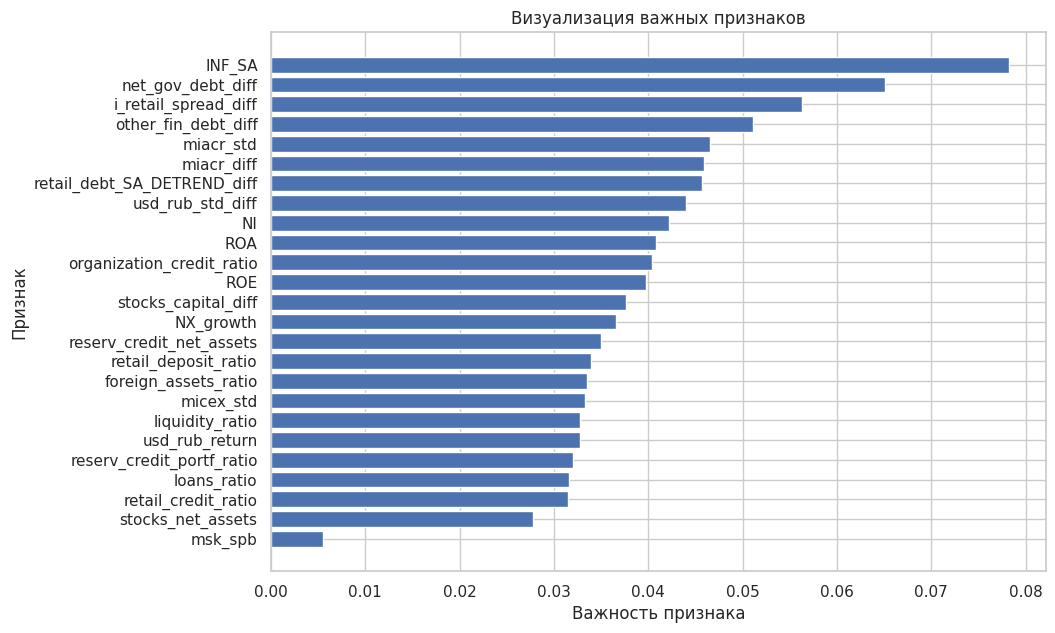

In [ ]:
# Вычисление важности признаков
feature_importance = rf_model.feature_importances_
feature_names = significant_features

# Создание датафрейма с важностью признаков
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Отображение значений важности в виде таблицы параметр-значение
display(feature_importance_df)

# Создание столбчатой диаграммы важности признаков
plt.figure(figsize=(10, 7))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], align='center')
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.title('Визуализация важных признаков')

plt.show()

Метод главных компонент

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)
y_train = np.array(y_train)

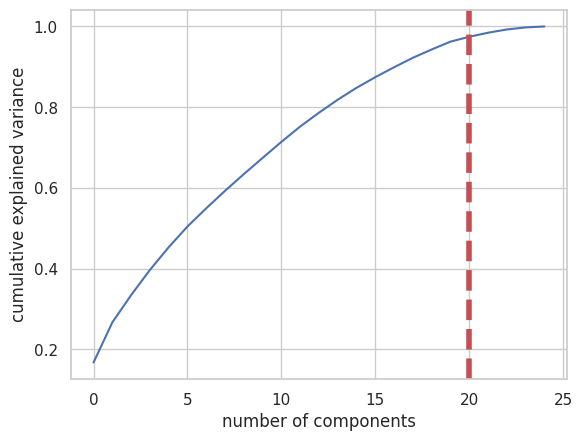

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.167503,0.167503
1,0.266716,0.099213
2,0.334418,0.067702
3,0.396758,0.062339
4,0.453020,0.056263
5,0.504404,0.051383
6,0.549518,0.045114
7,0.592776,0.043259
8,0.634205,0.041429
9,0.674346,0.040142


In [ ]:
from sklearn.decomposition import PCA

pca_test = PCA(n_components=25)
pca_test.fit(X_train_scaled)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=20, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(25))

In [ ]:
from sklearn.decomposition import TruncatedSVD

# Используем метод TruncatedSVD для уменьшения размерности до 20 компонент
svd = TruncatedSVD(n_components=20)
X_train_reduced = svd.fit_transform(X_train_scaled)

# Оценим объясненную дисперсию
explained_variance = np.sum(svd.explained_variance_ratio_)
print("Объясненная дисперсия 20 компонент:", explained_variance)

Объясненная дисперсия 20 компонент: 0.9624218499036601


использование PCA для перехода от 25 переменных к 20 компонентам позволяет объяснить 96% дисперсии данных, а другие 5 компонент объясняют менее 6% дисперсии, а это значит, что от них мы можем отказаться.

In [ ]:
# Использование сокращенных компонент для создания нового набора признаков
X_test_reduced = svd.transform(X_test_scaled)

In [ ]:
# Фиксируем время старта работы кода
start = time.time()

# Создание новой модели Random Forest
new_model = RandomForestClassifier()

# Обучение новой модели на сокращенных компонентах
new_model.fit(X_train_reduced, y_train)

#фиксируем время окончания работы кода
finish = time.time()

# вычитаем время старта из времени окончания и получаем результат в миллисекундах
res = finish - start
res_msec = res * 1000
print('Время работы в миллисекундах: ', res_msec)

Время работы в миллисекундах:  3285.4714393615723


In [ ]:
# Применение модели на тестовом наборе данных
y_pred = new_model.predict(X_test_reduced)

# Оценка производительности новой модели
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the new model:", accuracy)

Accuracy of the new model: 0.9527851458885942


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98      1796
         1.0       0.50      0.04      0.08        89

    accuracy                           0.95      1885
   macro avg       0.73      0.52      0.53      1885
weighted avg       0.93      0.95      0.93      1885



In [ ]:
from sklearn.metrics import roc_auc_score
# Оценка AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred)
print("AUC-ROC:", auc_roc)

AUC-ROC: 0.5213583243662572


##XGBoost

In [ ]:
# Выделим признаки и целевую переменную в новые переменные:
significant_features = ['ROA', 'ROE', 'liquidity_ratio', 'retail_deposit_ratio',
                        'retail_credit_ratio', 'organization_credit_ratio',
                        'reserv_credit_portf_ratio', 'reserv_credit_net_assets', 'stocks_net_assets',
                        'loans_ratio', 'foreign_assets_ratio', 'NX_growth', 'NI',
                        'INF_SA',  'usd_rub_std_diff', 'usd_rub_return',  'net_gov_debt_diff',
                        'other_fin_debt_diff', 'retail_debt_SA_DETREND_diff',
                        'stocks_capital_diff', 'i_retail_spread_diff', 'micex_std',
                        'miacr_std', 'miacr_diff', 'msk_spb']

X = group_df[significant_features]
y = group_df['default']

# Разделим данные на тренировочный и тестовый наборы и обучим модель Random Forest:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Фиксируем время старта работы кода
start = time.time()

# Инициализация и обучение модели XGBoost
xgb = xgb.XGBClassifier()
xgb.fit(X_train, y_train)

#фиксируем время окончания работы кода
finish = time.time()

# вычитаем время старта из времени окончания и получаем результат в миллисекундах
res = finish - start
res_msec = res * 1000
print('Время работы в миллисекундах: ', res_msec)

Время работы в миллисекундах:  3800.818681716919


In [ ]:
# Предсказание на проверочном наборе
y_pred = xgb.predict(X_test)

# Оценка производительности модели
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9570405727923628

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1198
         1.0       0.59      0.29      0.39        59

    accuracy                           0.96      1257
   macro avg       0.78      0.64      0.68      1257
weighted avg       0.95      0.96      0.95      1257



In [ ]:
from sklearn.metrics import roc_auc_score
# Оценка AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred)
print("AUC-ROC:", auc_roc)

AUC-ROC: 0.6390594493647606


,Feature,Importance
2,liquidity_ratio,0.022621
3,retail_deposit_ratio,0.025757
6,reserv_credit_portf_ratio,0.026248
15,usd_rub_return,0.027660
9,loans_ratio,0.027712
4,retail_credit_ratio,0.028693
11,NX_growth,0.029978
23,miacr_diff,0.030050
8,stocks_net_assets,0.030448
1,ROE,0.030924


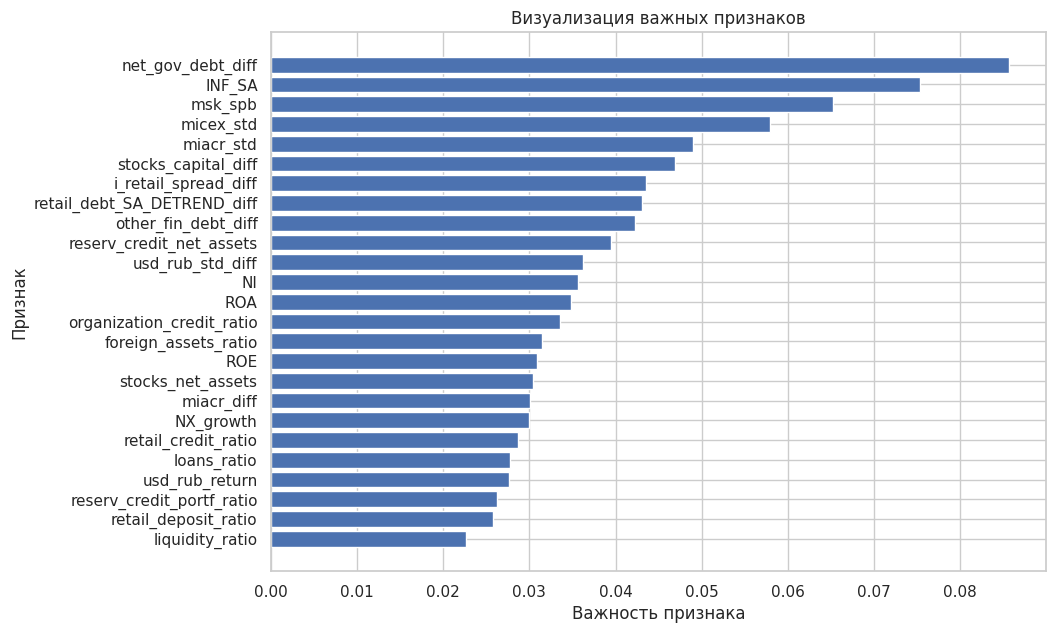

In [ ]:
# Вычисление важности признаков
feature_importance = xgb.feature_importances_
feature_names = significant_features

# Создание датафрейма с важностью признаков
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Отображение значений важности в виде таблицы параметр-значение
display(feature_importance_df)

# Создание столбчатой диаграммы важности признаков
plt.figure(figsize=(10, 7))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], align='center')
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.title('Визуализация важных признаков')

plt.show()

Создание сетки гиперпараметров для модели XGBoost  с использованием метода перекрестной проверки GridSearchCV

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Выделим признаки и целевую переменную в новые переменные:
significant_features = ['ROA', 'ROE', 'liquidity_ratio', 'retail_deposit_ratio',
                        'retail_credit_ratio', 'organization_credit_ratio',
                        'reserv_credit_portf_ratio', 'reserv_credit_net_assets', 'stocks_net_assets',
                        'loans_ratio', 'foreign_assets_ratio', 'NX_growth', 'NI',
                        'INF_SA',  'usd_rub_std_diff', 'usd_rub_return',  'net_gov_debt_diff',
                        'other_fin_debt_diff', 'retail_debt_SA_DETREND_diff',
                        'stocks_capital_diff', 'i_retail_spread_diff', 'micex_std',
                        'miacr_std', 'miacr_diff', 'msk_spb']

X = group_df[significant_features]
y = group_df['default']

# Разделим данные на тренировочный и тестовый наборы и обучите модель Random Forest:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Определение модели
xgb_model = XGBClassifier()

# Создание сетки гиперпараметров
param_grid = {
'max_depth': [3, 4, 5],
'learning_rate': [0.1, 0.01, 0.001],
'n_estimators': [100, 200, 300],
}

# Инициализация Grid Search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='roc_auc', n_jobs=-1)

# Обучение модели на данных
grid_search.fit(X, y)

# Получение наилучших гиперпараметров
best_params = grid_search.best_params_
print("Наилучшие гиперпараметры:", best_params)

Наилучшие гиперпараметры: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}


In [ ]:
from xgboost import XGBClassifier

# Фиксируем время старта работы кода
start = time.time()

# Инициализация модели с оптимальными гиперпараметрами
xgb_model_optimized = XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=300)
# Обучение модели на оптимизированных гиперпараметрах
xgb_model_optimized.fit(X_train, y_train)

#фиксируем время окончания работы кода
finish = time.time()

# вычитаем время старта из времени окончания и получаем результат в миллисекундах
res = finish - start
res_msec = res * 1000
print('Время работы в миллисекундах: ', res_msec)

Время работы в миллисекундах:  4838.72127532959


In [ ]:
# Предсказание на тестовом наборе
y_pred = xgb_model_optimized.predict(X_test)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9570405727923628

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1198
         1.0       0.57      0.27      0.37        59

    accuracy                           0.96      1257
   macro avg       0.77      0.63      0.67      1257
weighted avg       0.95      0.96      0.95      1257



In [ ]:
from sklearn.metrics import roc_auc_score
# Оценка AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred)
print("AUC-ROC:", auc_roc)

AUC-ROC: 0.630584873093574
